**Лабораторная работа №8**

Используя схемы переменных направлений и дробных шагов, решить двумерную начально-краевую задачу для дифференциального уравнения параболического типа. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,t)$. Исследовать зависимость погрешности от сеточных параметров $\tau, h_x, h_y$.

$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} - xy\sin{t}$

$u(0,y,t) = 0,$

$u(1,y,t) - u_x(1,y,t) = 0,$

$u(x,0,t) = 0,$

$u(x,1,t) - u_y(x,1,t) = 0,$

$u(x,y,0) = xy$

Аналитическое решение: $U(x,y,t) = xy\cos{t}$

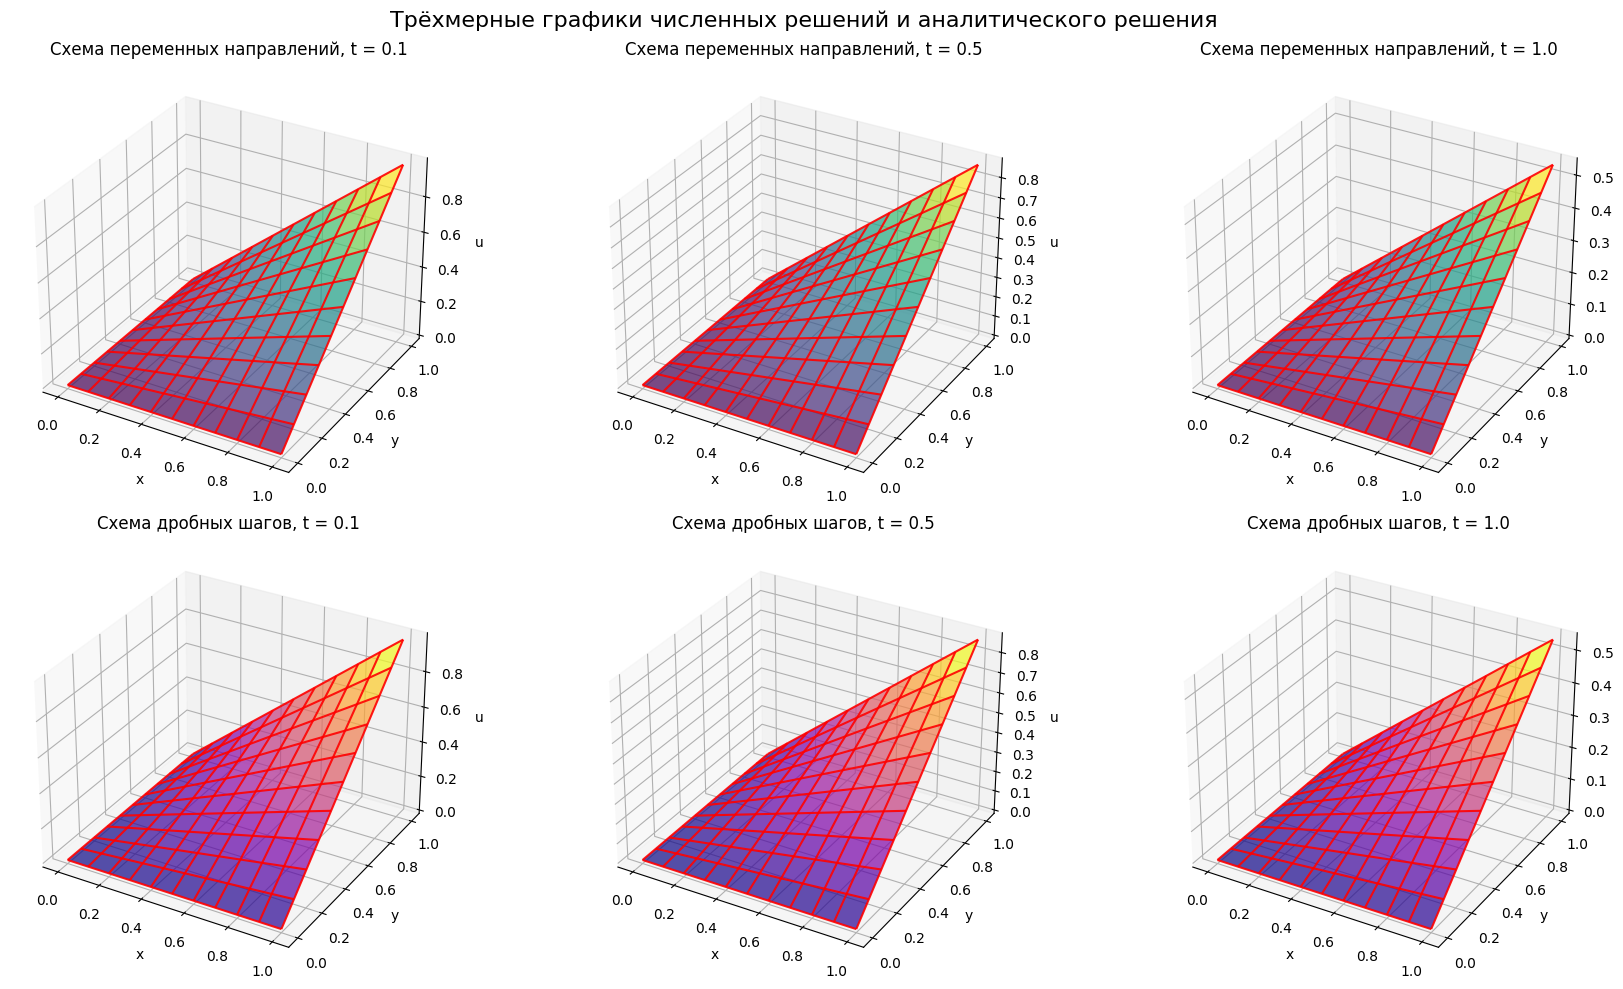

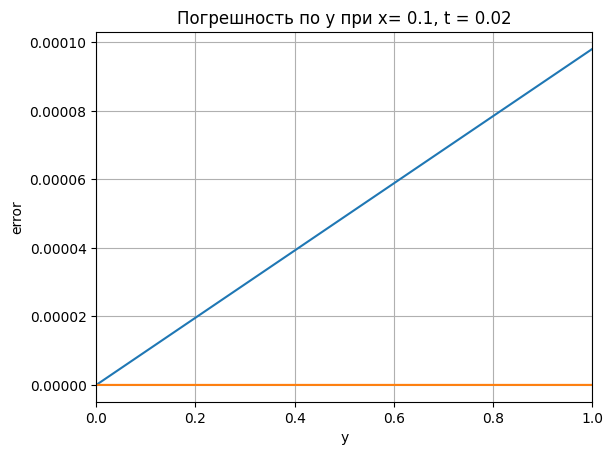

In [3]:
import numpy as np
from matplotlib import pyplot as plt


def f(x, y, t):
    """Функция источника для дифференциального уравнения."""
    return -x * y * np.sin(t)


def analytic_solution(x, y, t):
    """Аналитическое решение задачи."""
    return x * y * np.cos(t)


def phi1(y, t):
    """Граничное условие на границе x=0."""
    return 0


def phi2(y, t):
    """Граничное условие на границе x=lx."""
    return 0


def phi3(x, t):
    """Граничное условие на границе y=0."""
    return 0


def phi4(x, t):
    """Граничное условие на границе y=ly."""
    return 0


def psi(x, y):
    """Начальное условие задачи."""
    return x * y


def show_result_3d(u1, u2):
    """Отображение 3D-графиков численных решений и аналитического решения на разных моментах времени."""
    x = np.arange(0, lx + hx, hx)  # Генерация массива координат по x
    y = np.arange(0, ly + hy, hy)  # Генерация массива координат по y
    t = np.arange(0, t_max + tau, tau)  # Генерация массива временных шагов
    
    # Определение моментов времени для отображения
    times = [0.1, 0.5, 1.0]
    time_indices = [np.argmin(np.abs(t - time)) for time in times]  # Нахождение индексов ближайших временных шагов
    
    fig = plt.figure(figsize=(18, 10))
    fig.suptitle("Трёхмерные графики численных решений и аналитического решения", fontsize=16)
    
    for idx, t_i in enumerate(time_indices):
        # Создание сетки координат для аналитического решения
        X, Y = np.meshgrid(x, y)
        analytic = analytic_solution(X, Y, t[t_i])  # Вычисление аналитического решения в текущий момент времени
        
        # Решение методом переменных направлений (u1)
        ax = fig.add_subplot(2, len(time_indices), idx + 1, projection='3d')
        ax.plot_surface(X, Y, u1[:, :, t_i].T, cmap='viridis', alpha=0.7)  # Построение поверхностей численного решения
        ax.plot_wireframe(X, Y, analytic, color='red', alpha=0.9)  # Наложение аналитического решения
        ax.set_title(f"Схема переменных направлений, t = {times[idx]}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("u")
        # ax.legend(["Numerical (Method 1)", "Analytic"], loc="best")
        
        # Решение схемой дробных шагов (u2)
        ax = fig.add_subplot(2, len(time_indices), idx + 1 + len(time_indices), projection='3d')
        ax.plot_surface(X, Y, u2[:, :, t_i].T, cmap='plasma', alpha=0.7)  # Построение поверхностей численного решения
        ax.plot_wireframe(X, Y, analytic, color='red', alpha=0.9)  # Наложение аналитического решения
        ax.set_title(f"Схема дробных шагов, t = {times[idx]}")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("u")
        # ax.legend(["Numerical (Method 2)", "Analytic"], loc="best")
    
    plt.tight_layout()
    plt.show()


def show_inaccuracy(u1, u2):
    """Отображение графика погрешности по y при фиксированных x и t."""
    x = np.arange(0, lx + hx, hx)  # Генерация массива координат по x
    y = np.arange(0, ly + hy, hy)  # Генерация массива координат по y
    t = np.arange(0, t_max + tau, tau)  # Генерация массива временных шагов
    x_i = 1  # Индекс фиксированного x для анализа погрешности
    t_i = 2  # Индекс фиксированного времени для анализа погрешности
    plt.title(f"Погрешность по y при x= {x[x_i]}, t = {t[t_i]}")
    
    for i in range(2):
        inaccuracy = []
        if i == 0:
            u_tfix = u1[:, :, t_i]  # Численное решение методом переменных направлений
        else:
            u_tfix = u2[:, :, t_i]  # Численное решение схемой дробных шагов
    
        for j in range(count_y + 1):
            # Вычисление разности между аналитическим и численным решением
            a = analytic_solution(x, y[j], t[t_i]) - u_tfix[:, j]
            inaccuracy = np.append(inaccuracy, np.linalg.norm(a))  # Вычисление нормы разности
    
        plt.plot(y, inaccuracy)  # Построение графика погрешности
    
    plt.xlabel("y")
    plt.ylabel("error")
    plt.xlim((0, ly))
    plt.grid(True)
    plt.show()


# Основные параметры задачи
t_max = 1             # Максимальное время моделирования
t_count = 100         # Количество временных шагов
tau = t_max / t_count  # Размер временного шага
count_x = 10          # Количество узлов по оси x
count_y = 10          # Количество узлов по оси y
lx = 1                # Длина области по оси x
ly = 1                # Длина области по оси y
hx = lx / count_x     # Шаг по оси x
hy = ly / count_y     # Шаг по оси y


def alternative_directions_scheme():
    """Реализация схемы переменных направлений для решения задачи."""
    u = np.zeros((count_x + 1, count_y + 1, t_count + 1))  # Инициализация массива решений
    u_1 = np.zeros((count_x + 1, count_y + 1))  # Вспомогательный массив для промежуточных вычислений
    u_2 = np.zeros((count_x + 1, count_y + 1))  # Вспомогательный массив для промежуточных вычислений

    ai = np.zeros(count_x + 1)  # Нижняя диагональ матрицы
    bi = np.zeros(count_x + 1)  # Диагональ матрицы
    ci = np.zeros(count_x + 1)  # Верхняя диагональ матрицы
    di = np.zeros(count_x + 1)  # Правая часть системы уравнений

    # Установка начальных условий
    for i in range(count_x + 1):
        for j in range(count_y + 1):
            u[i, j, 0] = psi(i * hx, j * hy)  # Начальное условие

    # Итерация по временным шагам
    for k in range(1, t_count + 1):
        u_prev = u[:, :, k - 1]  # Сохранение решения на предыдущем временном шаге
        t_step = tau * (k - 0.5)  # Текущее время для схемы переменных направлений

        # Итерация по строкам (y) для решения тридиагональных систем
        for j in range(count_y):
            bi[0] = hx
            bi[-1] = hx - 1
            ci[0] = 0
            ai[-1] = 1
            di[0] = phi1(j * hy, t_step) * hx
            di[-1] = phi2(j * hy, t_step) * hx
            for i in range(1, count_x):
                ai[i] = 1
                bi[i] = -2 * (hx**2) / tau - 2
                ci[i] = 1
                di[i] = (
                    -2 * (hx**2) * u_prev[i, j] / tau
                    - (hx**2)
                    * (u_prev[i, j + 1] - 2 * u_prev[i, j] + u_prev[i, j - 1])
                    / (hy**2)
                    - (hx**2) * f(i * hx, j * hy, t_step)
                )

            ta = progonka(ai, bi, ci, di)  # Решение тридиагональной системы
            for i in range(count_x + 1):
                u_1[i, j] = ta[i]  # Обновление промежуточного решения
                u_1[i, 0] = phi3(i * hx, t_step)  # Применение граничных условий на y=0
                u_1[i, -1] = (phi4(i * hx, t_step) - u_1[i, -2] / hy) / (1 - 1 / hy)  # Граничные условия на y=ly

        # Применение граничных условий на x=0 и x=lx после решения по y
        for j in range(count_y + 1):
            u_1[0, j] = phi1(j * hy, t_step)  # Граничное условие на x=0
            u_1[-1, j] = (phi2(j * hy, t_step) - u_1[-2, j] / hx) / (1 - 1 / hx)  # Граничное условие на x=lx

        # Итерация по столбцам (x) для решения тридиагональных систем
        for i in range(count_x):
            bi[0] = hy
            bi[-1] = hy - 1
            ci[0] = 0
            ai[-1] = 1
            di[0] = phi3(i * hx, k * tau) * hy
            di[-1] = phi4(i * hx, k * tau) * hy

            for j in range(1, count_y):
                ai[j] = 1
                bi[j] = -2 * (hy**2) / tau - 2
                ci[j] = 1
                di[j] = (
                    -2 * (hy**2) * u_1[i, j] / tau
                    - (hy**2) * (u_1[i + 1, j] - 2 * u_1[i, j] + u_1[i - 1, j]) / (hx**2)
                    - (hy**2) * f(i * hx, j * hy, k * tau)
                )
            ta = progonka(ai, bi, ci, di)  # Решение тридиагональной системы
            for j in range(count_y + 1):
                u_2[i, j] = ta[j]  # Обновление промежуточного решения
                u_2[0, j] = phi1(j * hy, k * tau)  # Применение граничных условий на x=0
                u_2[-1, j] = (phi2(j * hy, k * tau) - u_2[-2, j] / hx) / (1 - 1 / hx)  # Граничные условия на x=lx

        # Применение граничных условий на y=0 и y=ly после решения по x
        for i in range(count_x + 1):
            u_2[i, 0] = phi3(i * hx, k * tau)  # Граничное условие на y=0
            u_2[i, -1] = (phi4(i * hx, k * tau) - u_2[i, -2] / hy) / (1 - 1 / hy)  # Граничное условие на y=ly
            for j in range(count_y + 1):
                u[i, j, k] = u_2[i, j]  # Обновление решения на текущий временной шаг

    return u


# Схема дробных шагов
def fractional_steps_scheme():
    """Реализация схемы дробных шагов для решения задачи."""
    u = np.zeros((count_x + 1, count_y + 1, t_count + 1))  # Инициализация массива решений
    u_1 = np.zeros((count_x + 1, count_y + 1))  # Вспомогательный массив для промежуточных вычислений
    u_2 = np.zeros((count_x + 1, count_y + 1))  # Вспомогательный массив для промежуточных вычислений

    ai = np.zeros(count_x + 1)  # Нижняя диагональ матрицы
    bi = np.zeros(count_x + 1)  # Диагональ матрицы
    ci = np.zeros(count_x + 1)  # Верхняя диагональ матрицы
    di = np.zeros(count_x + 1)  # Правая часть системы уравнений

    # Установка начальных условий
    for i in range(count_x + 1):
        for j in range(count_y + 1):
            u[i, j, 0] = psi(i * hx, j * hy)  # Начальное условие

    # Итерация по временным шагам
    for k in range(1, t_count + 1):
        u_prev = u[:, :, k - 1]  # Сохранение решения на предыдущем временном шаге
        t_step = tau * (k - 1)  # Текущее время для схемы дробных шагов

        # Итерация по строкам (y) для решения тридиагональных систем
        for j in range(count_y):
            bi[0] = hx
            bi[-1] = hx - 1
            ci[0] = 0
            ai[-1] = 1
            di[0] = phi1(j * hy, t_step) * hx
            di[-1] = phi2(j * hy, t_step) * hx
            for i in range(1, count_x):
                ai[i] = 1
                bi[i] = -(hx**2) / tau - 2
                ci[i] = 1
                di[i] = (
                    -(hx**2) * u_prev[i, j] / tau
                    - (hx**2) * f(i * hx, j * hy, t_step) / 2
                )

            ta = progonka(ai, bi, ci, di)  # Решение тридиагональной системы
            for i in range(count_x + 1):
                u_1[i, j] = ta[i]  # Обновление промежуточного решения
                u_1[i, 0] = phi3(i * hx, t_step)  # Применение граничных условий на y=0
                u_1[i, -1] = (phi4(i * hx, t_step) - u_1[i, -2] / hy) / (1 - 1 / hy)  # Граничные условия на y=ly

        # Применение граничных условий на x=0 и x=lx после решения по y
        for j in range(count_y + 1):
            u_1[0, j] = phi1(j * hy, t_step)  # Граничное условие на x=0
            u_1[-1, j] = (phi2(j * hy, t_step) - u_1[-2, j] / hx) / (1 - 1 / hx)  # Граничное условие на x=lx

        # Итерация по столбцам (x) для решения тридиагональных систем
        for i in range(count_x):
            bi[0] = hy
            bi[-1] = hy - 1
            ci[0] = 0
            ai[-1] = 1
            di[0] = phi3(i * hx, k * tau) * hy
            di[-1] = phi4(i * hx, k * tau) * hy

            for j in range(1, count_y):
                ai[j] = 1
                bi[j] = -(hy**2) / tau - 2
                ci[j] = 1
                di[j] = (
                    -(hy**2) * u_1[i, j] / tau
                    - (hy**2) * f(i * hx, j * hy, k * tau) / 2
                )
            ta = progonka(ai, bi, ci, di)  # Решение тридиагональной системы
            for j in range(count_y + 1):
                u_2[i, j] = ta[j]  # Обновление промежуточного решения
                u_2[0, j] = phi1(j * hy, k * tau)  # Применение граничных условий на x=0
                u_2[-1, j] = (phi2(j * hy, k * tau) - u_2[-2, j] / hx) / (1 - 1 / hx)  # Граничные условия на x=lx

        # Применение граничных условий на y=0 и y=ly после решения по x
        for i in range(count_x + 1):
            u_2[i, 0] = phi3(i * hx, k * tau)  # Граничное условие на y=0
            u_2[i, -1] = (phi4(i * hx, k * tau) - u_2[i, -2] / hy) / (1 - 1 / hy)  # Граничное условие на y=ly
            for j in range(count_y + 1):
                u[i, j, k] = u_2[i, j]  # Обновление решения на текущий временной шаг

    return u


def progonka(a, b, c, d):
    """Реализация метода прогонки (алгоритм Т. Крюца) для решения тридиагональных систем."""
    size = len(a)
    P = np.zeros(size)
    Q = np.zeros(size)
    P[0] = -c[0] / b[0]
    Q[0] = d[0] / b[0]

    # Прямой ход прогонки
    for i in range(1, size):
        s = b[i] + a[i] * P[i - 1]
        P[i] = -c[i] / s
        Q[i] = (d[i] - a[i] * Q[i - 1]) / s

    result = np.zeros(size)
    result[-1] = Q[-1]

    # Обратный ход прогонки
    for i in range(size - 2, -1, -1):
        result[i] = P[i] * result[i + 1] + Q[i]

    return result


# Выполнение численных методов решения
u1 = alternative_directions_scheme()  # Решение методом переменных направлений
u2 = fractional_steps_scheme()         # Решение схемой дробных шагов

# Отображение результатов
show_result_3d(u1, u2)  # Построение 3D-графиков решений
show_inaccuracy(u1, u2)  # Построение графика погрешности
